<a href="https://colab.research.google.com/github/Hyerim20/Introduction-to-Artificial-Intelligence/blob/main/%5BAI2025_Assignment%5D_CIFAR10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 Classification

## Import Packages

In [33]:
import sys
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### Data Preparation
Use CIFAR10 handwriting dataset

In [34]:
cifar10 = tf.keras.datasets.cifar10

Prepare data for training

In [35]:
# train / test split
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# minmax normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Compile and Train neural network

## CNN Modeling
Create a convolutional neural network

### Goal

Improve the provided basic CNN model and achieve CIFAR-10 **test accuracy ≥ 75%**.


Modify the network architecture!

In [36]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)), # Explicit Input layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3), # Adjusted dropout rate

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'), # Increased filters
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'), # Increased filters
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3), # Adjusted dropout rate

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'), # Third convolutional block
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'), # Third convolutional block
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3), # Dropout for the third block

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4), # Adjusted dropout rate for dense layer
    tf.keras.layers.Dense(10, activation='softmax'),
])

# Compile and Train neural network

In [37]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - accuracy: 0.3861 - loss: 1.9191
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6474 - loss: 1.0046
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7107 - loss: 0.8261
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7508 - loss: 0.7200
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7844 - loss: 0.6249
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7967 - loss: 0.5859
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8194 - loss: 0.5250
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8361 - loss: 0.4754
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8493 - loss: 0.4346
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8600 - loss: 0.4054


## Evaluate neural network performance


In [38]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 3s - 9ms/step - accuracy: 0.8308 - loss: 0.5216


[0.5215857028961182, 0.8307999968528748]

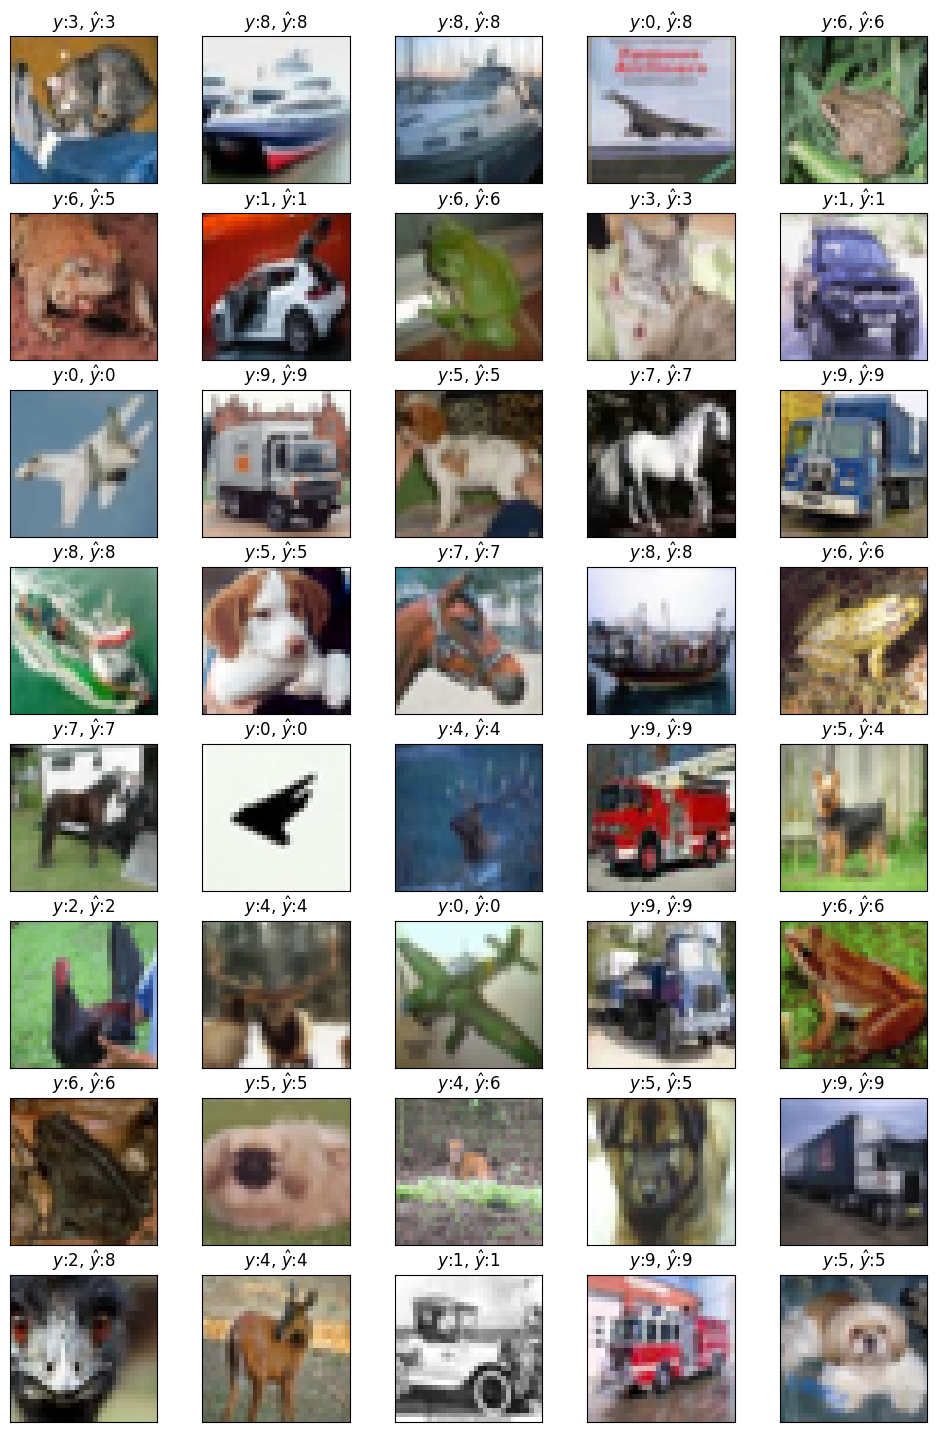

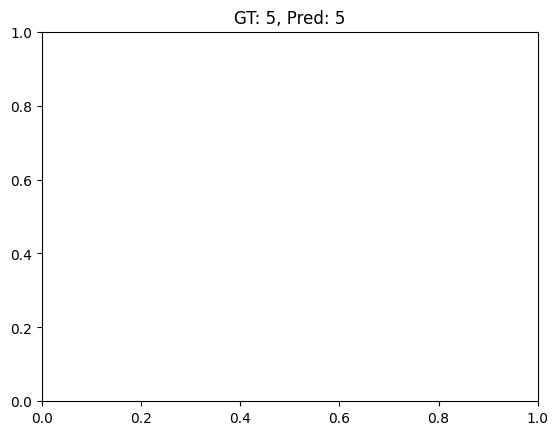

In [39]:
prob = model.predict(x_test[0:40], verbose=0)
pred = tf.argmax(prob, axis=1)

fig = plt.figure(figsize=(12, 18))
for i in range(40):
    subplot = fig.add_subplot(8, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    string = r'$\hat{y}$'
    subplot.set_title(f'$y$:{tf.argmax(y_test[i])}, {string}:{pred[i].numpy()}')
    subplot.imshow(tf.squeeze(x_test[i]))
plt.show()
true_label = tf.argmax(y_test[i]).numpy()
pred_label = pred[i].numpy()
plt.title(f"GT: {true_label}, Pred: {pred_label}")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

In [40]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.8307999968528748
